Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

%matplotlib inline

In [3]:
dataset = pd.read_excel("Downloads/ML/Sample Data.xlsx")
dataset

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,1,0.317,11330,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1
1,2,0.000,30309,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1
2,3,0.015,16069,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1
3,4,0.000,23733,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1
4,5,0.888,19360,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,79849,0.249,25555,64420,0,0,0,1,2,4,0,99.080,10,A,Urban,5700,1
79849,79850,0.003,16797,660040,1,0,0,0,2,1,0,99.650,9,B,Urban,28500,1
79850,79851,0.012,24835,227760,0,0,0,0,2,3,0,99.660,11,A,Rural,11700,1
79851,79852,0.190,10959,153060,1,0,0,0,2,1,0,99.460,24,A,Urban,11700,1


In [4]:
dataset.shape
# data consist of 17 features with 79853 data samples

(79853, 17)

In [5]:
dataset.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'Marital Status', 'Veh_Owned',
       'No_of_dep', 'Accomodation', 'risk_score', 'no_of_premiums_paid',
       'sourcing_channel', 'residence_area_type', 'premium', 'renewal'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79853 non-null  int64  
 5   Count_6-12_months_late            79853 non-null  int64  
 6   Count_more_than_12_months_late    79853 non-null  int64  
 7   Marital Status                    79853 non-null  int64  
 8   Veh_Owned                         79853 non-null  int64  
 9   No_of_dep                         79853 non-null  int64  
 10  Accomodation                      79853 non-null  int64  
 11  risk_score                        79853 non-null  float64
 12  no_o

In [7]:
dataset["Veh_Owned"].corr(dataset["renewal"]) 
# Gives Correlation between Veh_Owned and renewal

0.0003826182568618026

In [8]:
dataset.isnull().sum()
# No Null Values

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
Marital Status                      0
Veh_Owned                           0
No_of_dep                           0
Accomodation                        0
risk_score                          0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
dtype: int64

In [9]:
#'id' is not a significant column
del dataset["id"]

Converting categorical columns("residence_area_type", "sourcing_channel") to numeric

In [10]:
print("Distinct values in residence_area_type column:",len(set(dataset["residence_area_type"])))
print("Distinct values in sourcing_channel column:",len(set(dataset["sourcing_channel"])))

Distinct values in residence_area_type column: 2
Distinct values in sourcing_channel column: 5


In [11]:
dataset["residence_area_type"] = pd.get_dummies(dataset["residence_area_type"], drop_first= True)

In [12]:
dummy = pd.get_dummies(dataset["sourcing_channel"], drop_first = True)
del dataset["sourcing_channel"]
dataset = pd.concat([dataset,dummy],axis=1)

In [13]:
#‘age’ to display customer’s age in years for improved readability
dataset["Age"] = round(dataset["age_in_days"]/365,0) 
dataset['Age'] = dataset['Age'].astype(int)

del dataset["age_in_days"]

In [14]:
#income in millions upto 2 digit
#‘cashPercent’ to to display Cash premium payment in % term
dataset["Income"] = round(dataset["Income"]/10000, 2)


In [15]:
dataset['perc_premium_paid_by_cash_credit'] *= 100 #Displaying in the % Form

In [16]:
dataset

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,residence_area_type,premium,renewal,B,C,D,E,Age
0,31.7,9.01,0,0,0,0,3,3,1,98.810,8,0,5400,1,0,0,0,0,31
1,0.0,15.61,0,0,0,1,3,1,1,99.066,3,1,11700,1,0,0,0,0,83
2,1.5,14.50,1,0,0,0,1,1,1,99.170,14,1,18000,1,0,1,0,0,44
3,0.0,18.76,0,0,0,1,1,1,0,99.370,13,1,13800,1,0,0,0,0,65
4,88.8,10.30,7,3,4,0,2,1,0,98.800,15,1,7500,0,0,0,0,0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,24.9,6.44,0,0,0,1,2,4,0,99.080,10,1,5700,1,0,0,0,0,70
79849,0.3,66.00,1,0,0,0,2,1,0,99.650,9,1,28500,1,1,0,0,0,46
79850,1.2,22.78,0,0,0,0,2,3,0,99.660,11,0,11700,1,0,0,0,0,68
79851,19.0,15.31,1,0,0,0,2,1,0,99.460,24,1,11700,1,0,0,0,0,30


In [17]:
dataset.describe()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,residence_area_type,premium,renewal,B,C,D,E,Age
count,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,31.428774,20.884393,0.248369,0.078093,0.059935,0.498679,1.998009,2.503012,0.501296,99.067243,10.863887,0.603396,10924.507533,0.937410,0.206780,0.150765,0.094661,0.007627,51.607404
std,33.491457,49.658248,0.691102,0.436251,0.311840,0.500001,0.817248,1.115901,0.500001,0.725892,5.170687,0.489195,9401.676542,0.242226,0.404999,0.357821,0.292749,0.086997,14.270484
min,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.900000,2.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,3.400000,10.800000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,98.830000,7.000000,0.000000,5400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,41.000000
50%,16.700000,16.660000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,99.180000,10.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,53.800000,25.210000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,1.000000,99.520000,14.000000,1.000000,13800.000000,1.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,100.000000,9026.260000,13.000000,17.000000,11.000000,1.000000,3.000000,4.000000,1.000000,99.890000,60.000000,1.000000,60000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,103.000000


In [18]:
dataset["LatePayment"] = dataset['Count_3-6_months_late'] + dataset['Count_6-12_months_late'] + dataset['Count_more_than_12_months_late']

In [19]:
del dataset['Count_3-6_months_late']
del dataset['Count_6-12_months_late']
del dataset['Count_more_than_12_months_late']


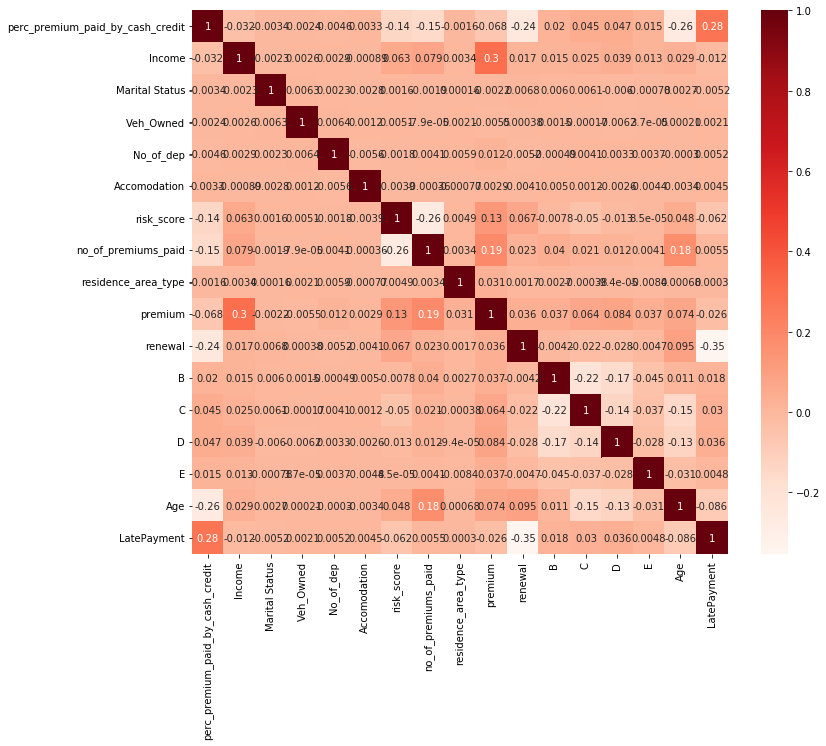

In [20]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Explanatory Data Analysis

# 1. Univariate Analysis

In [21]:
dataset

,perc_premium_paid_by_cash_credit,Income,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,residence_area_type,premium,renewal,B,C,D,E,Age,LatePayment
0,31.7,9.01,0,3,3,1,98.810,8,0,5400,1,0,0,0,0,31,0
1,0.0,15.61,1,3,1,1,99.066,3,1,11700,1,0,0,0,0,83,0
2,1.5,14.50,0,1,1,1,99.170,14,1,18000,1,0,1,0,0,44,1
3,0.0,18.76,1,1,1,0,99.370,13,1,13800,1,0,0,0,0,65,0
4,88.8,10.30,0,2,1,0,98.800,15,1,7500,0,0,0,0,0,53,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,24.9,6.44,1,2,4,0,99.080,10,1,5700,1,0,0,0,0,70,0
79849,0.3,66.00,0,2,1,0,99.650,9,1,28500,1,1,0,0,0,46,1
79850,1.2,22.78,0,2,3,0,99.660,11,0,11700,1,0,0,0,0,68,0
79851,19.0,15.31,0,2,1,0,99.460,24,1,11700,1,0,0,0,0,30,1


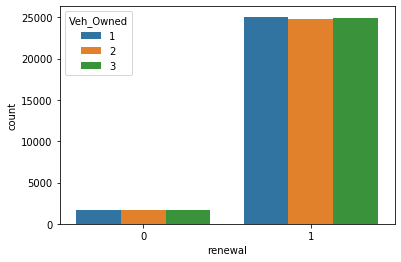

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(hue =dataset["Veh_Owned"], x = dataset["renewal"])

Text(0.5, 1.0, 'Histogram of CashPercent')

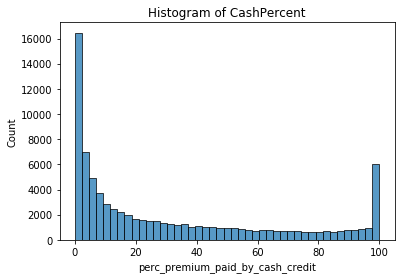

In [23]:
sns.histplot(data = dataset['perc_premium_paid_by_cash_credit']).set_title("Histogram of CashPercent")

# Data has outliers

Mean of Cash percent is: 31.428774122449784 %


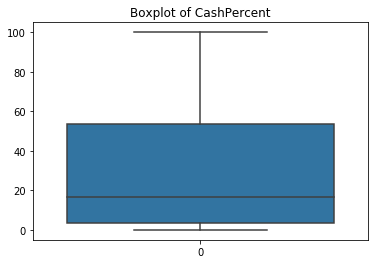

In [24]:
sns.boxplot(data = dataset['perc_premium_paid_by_cash_credit']).set_title("Boxplot of CashPercent")

print("Mean of Cash percent is:", dataset['perc_premium_paid_by_cash_credit'].mean(), '%' )

Mean of age is: 51.607403604122574
Median of Age is: 51.0


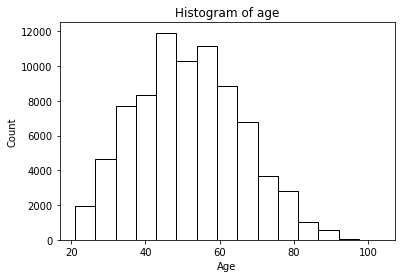

In [25]:
sns.histplot(data = dataset['Age'],bins = 15, color = 'w').set_title("Histogram of age")

print("Mean of age is:", dataset['Age'].mean())
print("Median of Age is:", dataset['Age'].median())

Text(0.5, 1.0, 'Boxplot of Age')

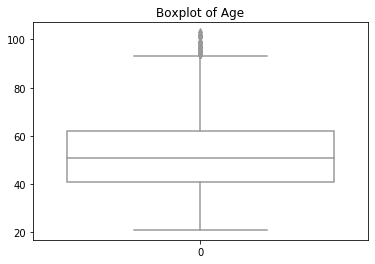

In [26]:
sns.boxplot(data = dataset['Age'], color = 'w').set_title("Boxplot of Age")

Text(0.5, 1.0, 'Histogram of Income')

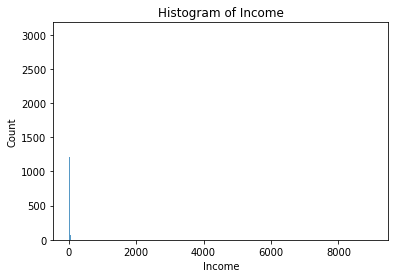

In [30]:
sns.histplot(data = dataset['Income']).set_title("Histogram of Income")

# Data has too many outliers

Text(0.5, 1.0, 'Boxplot of Income')

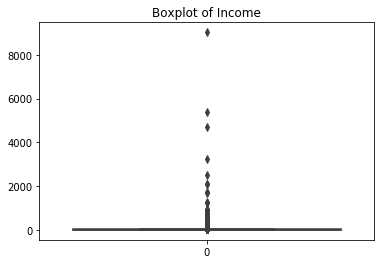

In [31]:
sns.boxplot(data = dataset['Income']).set_title("Boxplot of Income")


In [32]:
#Income Column has too many Outliers

Mean is: 0.38639750541620227


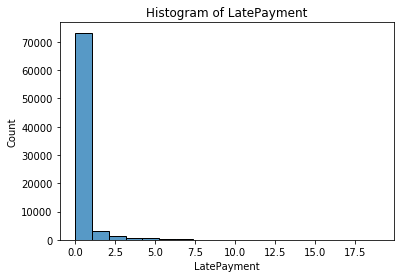

In [33]:
sns.histplot(data = dataset['LatePayment']).set_title("Histogram of LatePayment")

print("Mean is:", dataset["LatePayment"].mean())

Text(0.5, 1.0, 'Boxplot of LatePayment')

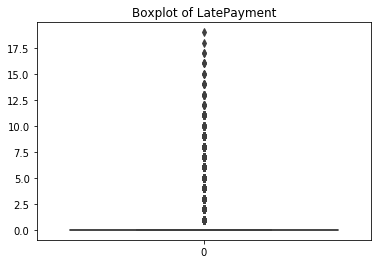

In [34]:
sns.boxplot(data = dataset['LatePayment']).set_title("Boxplot of LatePayment")


Text(0.5, 1.0, 'Histogram of Risk_Score')

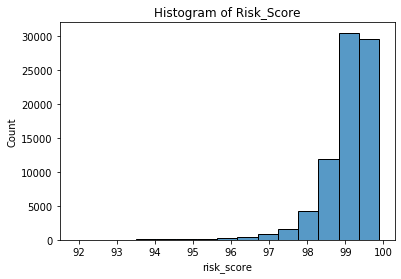

In [35]:
sns.histplot(data = dataset['risk_score'], bins = 15).set_title("Histogram of Risk_Score")


Text(0.5, 1.0, 'Boxplot of risk_score')

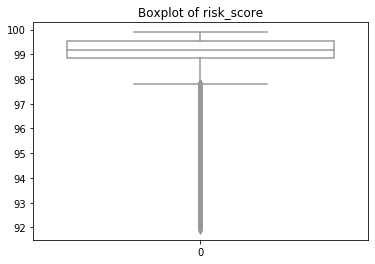

In [36]:
sns.boxplot(data = dataset['risk_score'], color = 'w' ).set_title("Boxplot of risk_score")


Text(0.5, 1.0, 'Histogram of Vehicle Owned')

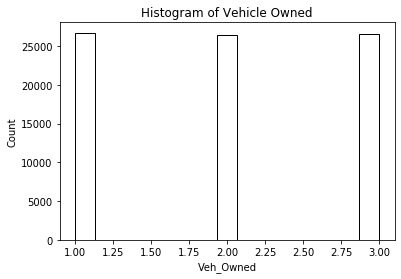

In [37]:
sns.histplot(data = dataset['Veh_Owned'], bins = 15, color = 'w').set_title("Histogram of Vehicle Owned")


Text(0.5, 1.0, 'Histogram of Number of Department')

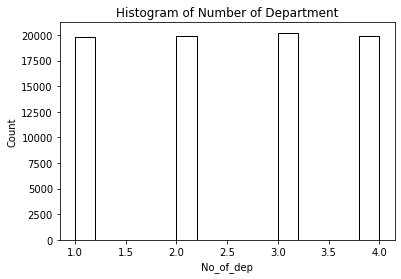

In [38]:
sns.histplot(data = dataset['No_of_dep'], bins = 15, color  = 'w').set_title("Histogram of Number of Department")


Text(0.5, 1.0, 'Histogram of Accomodation')

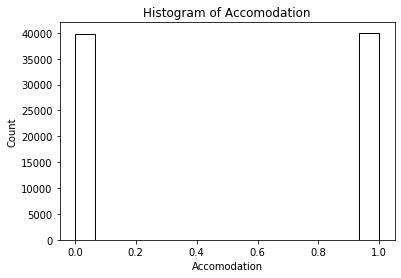

In [39]:
sns.histplot(data = dataset['Accomodation'], bins  = 15, color = 'w').set_title("Histogram of Accomodation")


Text(0.5, 1.0, 'Histogram of Marital Status')

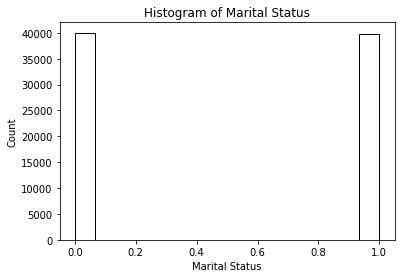

In [40]:
sns.histplot(data = dataset['Marital Status'], bins = 15, color = 'w').set_title("Histogram of Marital Status")


Text(0.5, 1.0, 'Histogram of Renewal')

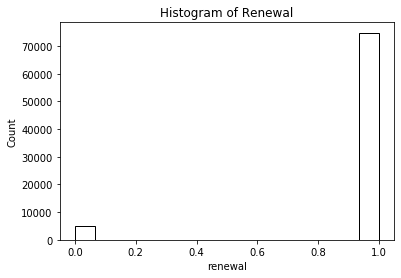

In [41]:
sns.histplot(data = dataset['renewal'], bins = 15, color = 'w').set_title("Histogram of Renewal")


In [ ]:
# Data is too much unbalanced so smote will be used.

# 2. Bivariate Data Analysis

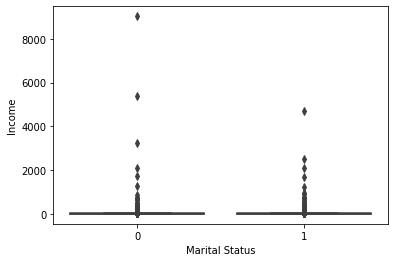

In [42]:
sns.boxplot(x = "Marital Status", y = "Income", data  = dataset)

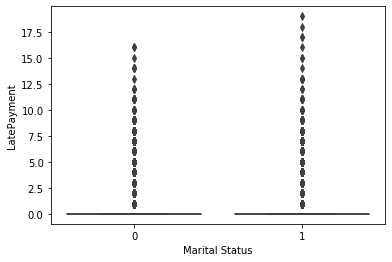

In [43]:
sns.boxplot(x = "Marital Status", y = "LatePayment", data  = dataset)

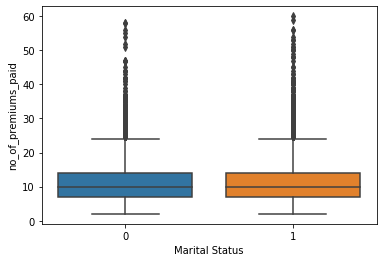

In [44]:
sns.boxplot(x = "Marital Status", y = "no_of_premiums_paid", data  = dataset)

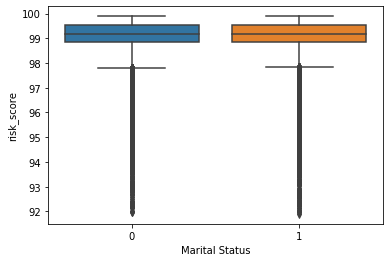

In [45]:
sns.boxplot(x = "Marital Status", y = "risk_score", data  = dataset)

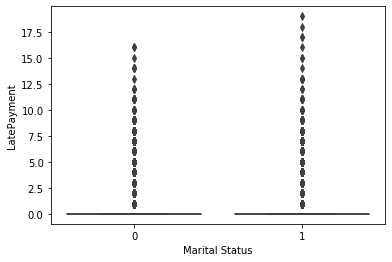

In [46]:
sns.boxplot(x = "Marital Status", y = "LatePayment", data  = dataset)

# Data Normalization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
display(dataset)

,perc_premium_paid_by_cash_credit,Income,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,residence_area_type,premium,renewal,B,C,D,E,Age,LatePayment
0,31.7,9.01,0,3,3,1,98.810,8,0,5400,1,0,0,0,0,31,0
1,0.0,15.61,1,3,1,1,99.066,3,1,11700,1,0,0,0,0,83,0
2,1.5,14.50,0,1,1,1,99.170,14,1,18000,1,0,1,0,0,44,1
3,0.0,18.76,1,1,1,0,99.370,13,1,13800,1,0,0,0,0,65,0
4,88.8,10.30,0,2,1,0,98.800,15,1,7500,0,0,0,0,0,53,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,24.9,6.44,1,2,4,0,99.080,10,1,5700,1,0,0,0,0,70,0
79849,0.3,66.00,0,2,1,0,99.650,9,1,28500,1,1,0,0,0,46,1
79850,1.2,22.78,0,2,3,0,99.660,11,0,11700,1,0,0,0,0,68,0
79851,19.0,15.31,0,2,1,0,99.460,24,1,11700,1,0,0,0,0,30,1


In [51]:
y = dataset['renewal'].values

In [52]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
x = dataset.drop('renewal',axis=1).values

In [55]:
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 0.00809841, -0.23912376, -0.99736113, ..., -0.08766484,
        -1.4440668 , -0.37036361],
       [-0.93841756, -0.10621449,  1.00264586, ..., -0.08766484,
         2.19984075, -0.37036361],
       [-0.89362974, -0.12856741, -0.99736113, ..., -0.08766484,
        -0.53308991,  0.58814053],
       ...,
       [-0.9025873 ,  0.0381733 , -0.99736113, ..., -0.08766484,
         1.14871357, -0.37036361],
       [-0.37110515, -0.11225582, -0.99736113, ..., -0.08766484,
        -1.51414195,  0.58814053],
       [-0.93841756,  0.23189863, -0.99736113, ..., -0.08766484,
         0.16766154, -0.37036361]])

Splitting Data

In [56]:
from sklearn.model_selection import train_test_split

# split into 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.300, random_state= 42)


# SMOTE

In [57]:
from sklearn.model_selection import train_test_split


# describes info about train and test set
print("Number X_train dataset: ", x_train.shape)
print("Number y_train dataset: ", y_train.shape)
print("Number X_test dataset: ", x_test.shape)
print("Number y_test dataset: ", y_test.shape)


Number X_train dataset:  (55897, 16)
Number y_train dataset:  (55897,)
Number X_test dataset:  (23956, 16)
Number y_test dataset:  (23956,)


In [58]:
dataset["renewal"].value_counts()

1    74855
0     4998
Name: renewal, dtype: int64

In [59]:
print(sum(dataset["renewal"]==0)/len(dataset)*100)

6.259000914179805


In [60]:
#So In the dataset there is a clear class imbalance as renewal has only 6% of cases which has defaulted and
#remaining are No default cases.

In [61]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 52412
Before OverSampling, counts of label '0': 3485 



In [62]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=42)
x_train_res,  y_train_res = sm.fit_resample(x_train, y_train.ravel() )

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (104824, 16)
After OverSampling, the shape of train_y: (104824,) 

After OverSampling, counts of label '1': 52412
After OverSampling, counts of label '0': 52412


In [63]:
#SMOTE Algorithm has oversampled the minority instances and made it equal to majority class

# Modelling

# 1. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

LR = LogisticRegression(random_state = 42)

#fitting data into logistic 
LR.fit(x_train_res,y_train_res)

LogisticRegression(random_state=42)

In [65]:
prediction = LR.predict(x_test)

accuracy_score(y_test,prediction)

0.7810151945232927

In [66]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.19      0.73      0.30      1513
           1       0.98      0.78      0.87     22443

    accuracy                           0.78     23956
   macro avg       0.58      0.76      0.58     23956
weighted avg       0.93      0.78      0.83     23956



In [67]:
probability = LR.predict_proba(x_test)

#The higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.
print("AUC of the model is;",  roc_auc_score(y_test , probability[:, 1]))

AUC of the model is; 0.8342941429443096


In [68]:
print(confusion_matrix(y_test,prediction))

[[ 1108   405]
 [ 4841 17602]]


In [69]:
mat = np.array(confusion_matrix(y_test,prediction))

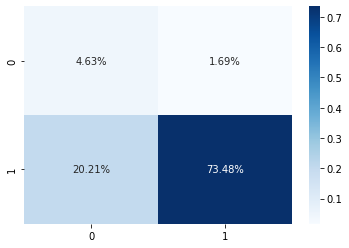

In [70]:
import seaborn as sns
sns.heatmap(mat/np.sum(mat), annot=True, fmt = '0.2%' , cmap = "Blues")

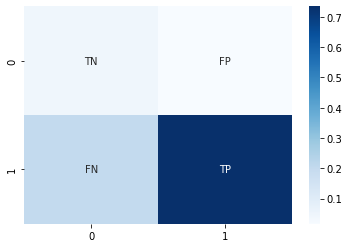

In [71]:
import seaborn as sns

labels = np.array([['TN', 'FP'], ['FN', 'TP']])

sns.heatmap(mat/np.sum(mat), annot=labels, fmt = '' , cmap = "Blues")

In [72]:
mat  = np.array(confusion_matrix(y_test, prediction))


#Sensitivity measures the proportion of positives that are correctly identified
print("Specificity (TN/(TN+FP)) of the model is: ", mat[0,0]/(mat[0,0]+ mat[0,1]))


#Specificity measures the proportion of negatives that are correctly identified
print("Sensitivity (TP/(TP+FN)) of the model is: ", mat[1,1]/(mat[1,1]+ mat[1,0]),'\n')


Specificity (TN/(TN+FP)) of the model is:  0.7323198942498348
Sensitivity (TP/(TP+FN)) of the model is:  0.7842979993761975 



# 2. Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42)

In [74]:
RFC.fit(x_train_res, y_train_res.ravel())


RandomForestClassifier(random_state=42)

In [75]:
pre = RFC.predict(x_test)

accuracy_score(y_test,pre)

0.9292035398230089

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

%matplotlib inline

print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.40      0.26      0.32      1513
           1       0.95      0.97      0.96     22443

    accuracy                           0.93     23956
   macro avg       0.68      0.62      0.64     23956
weighted avg       0.92      0.93      0.92     23956



In [77]:
probabilities = RFC.predict_proba(x_test)

print("AUC of the model is:", roc_auc_score(y_test , probabilities[:, 1]) )

AUC of the model is: 0.819094986288095


In [78]:
cm = np.array(confusion_matrix(y_test,pre))

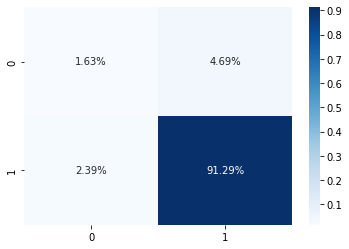

In [79]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '0.2%' , cmap = "Blues")

In [80]:
#mat  = np.array(confusion_matrix(y_test, prediction))


#Sensitivity measures the proportion of positives that are correctly identified
print("Specificity (TN/(TN+FP)) of the model is: ", cm[0,0]/(cm[0,0]+ cm[0,1]))


#Specificity measures the proportion of negatives that are correctly identified
print("Sensitivity (TP/(TP+FN)) of the model is: ", cm[1,1]/(cm[1,1]+ cm[1,0]),'\n')


Specificity (TN/(TN+FP)) of the model is:  0.25776602775941837
Sensitivity (TP/(TP+FN)) of the model is:  0.9744686539232723 



In [81]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1

    return(TP, FP, TN, FN)

print(perf_measure(y_test,pre))

(21870, 1123, 390, 573)


In [82]:
print("Model accuracy with Logistic Regression:", accuracy_score(y_test,prediction))
print("Model accuracy with Random Forest:", accuracy_score(y_test,pre))

Model accuracy with Logistic Regression: 0.7810151945232927
Model accuracy with Random Forest: 0.9292035398230089
